In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from hanspell import spell_checker

In [3]:
np.random.seed(3)
tf.random.set_seed(3)

In [86]:
korean=pd.read_excel('./project_textmine/korean.xlsx')
korean2=pd.read_excel('./project_textmine/korean2.xlsx')

stopword_list=pd.read_csv('./project_textmine/stopwords.txt',delimiter='\t')

stopwords=[]
for i in range(len(stopword_list['word'])):
    stopwords.append(stopword_list['word'][i])

In [87]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자,자음 제거
    text = re.sub('[.,;:\)*?!~`’^\-_+<>@\#$%&=#}※ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅌㅍ]', '', text)
    # 중복 생성 공백값
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[ㅏㅣ]','',text)
    text = re.sub('ㅋ+','ㅋㅋㅋ',text)
    text = re.sub('ㅎ+','ㅋㅋㅋ',text)
    text = re.sub('ㅠ+','ㅋㅋㅋ',text)
    text = re.sub('ㅜ+','ㅋㅋㅋ',text)
    text = re.sub('ㅎㄷㄷ','ㅋㅋㅋ',text)
    text = re.sub('후덜덜','ㅋㅋㅋ',text)
    text = re.sub('킥+','ㅋㅋㅋ',text)
    text = re.sub('NaN','메세지삭제',text)
    text = re.sub('0+', ' ', text)
    text = re.sub('1+', ' ', text)
    text = re.sub('2+', ' ', text)
    text = re.sub('3+', ' ', text)
    text = re.sub('4+', ' ', text)
    text = re.sub('5+', ' ', text)
    text = re.sub('6+', ' ', text)
    text = re.sub('7+', ' ', text)
    text = re.sub('8+', ' ', text)
    text = re.sub('9+', ' ', text)
    return text

In [88]:
def processing(text):
    text=preprocessing(text)
    spelled_sent = spell_checker.check(text)
    hanspell_sent = spelled_sent.checked 
    return hanspell_sent

In [89]:
korean=korean[korean['Emotion']!='중립']
korean=korean[korean['Emotion']!='혐오']
korean=korean[korean['Emotion']!='놀람']
korean['Emotion'].unique()

array(['공포', '분노', '슬픔', '행복'], dtype=object)

In [90]:
korean.reset_index(inplace=True,drop=True)

In [91]:
data1=korean2[korean2['Emotion']=='행복']
data2=korean2[korean2['Emotion']=='슬픔']
data3=korean2[korean2['Emotion']=='공포']
data4=korean2[korean2['Emotion']=='분노']

In [92]:
data4=data4.iloc[:1628,:]

In [93]:
data=pd.concat([data1,data2,data3,data4,korean])

In [94]:
data

,Sentence,Emotion
23,잘됐네. 그럼 이번에 해보면 되잖아.,행복
171,뉴욕이요. 가서 저는 공부하고. 오빠는 취업하기로. 운이 좋았어요.,행복
172,야... 잘됐네. 그 남자 땡잡았다.,행복
259,당연하지!,행복
301,... 기특해서. 귀여워서.,행복
...,...,...
22432,유느님 내일 이면 해피투게더가하네요~^^,행복
22433,승관아~ 너에게 편지를 안 쓸 수가 없네.,행복
22434,패떴 개그계 큰 대모 이경실 씨 1탄 잘 봤습니다,행복
22435,유재석 오라버니 해피투게더 해피파출소 편 봤어요,행복


In [95]:
data.reset_index(inplace=True)

In [96]:
y=[]
for i in range(len(korean['Emotion'])):
    if korean['Emotion'].iloc[i]=='공포':
        y.append([1,0,0,0])
    elif korean['Emotion'].iloc[i]=='분노':
        y.append([0,1,0,0])
    elif korean['Emotion'].iloc[i]=='슬픔':
        y.append([0,0,1,0])
    elif korean['Emotion'].iloc[i]=='행복':
        y.append([0,0,0,1])

In [97]:
import konlpy
from konlpy.tag import Kkma
from sklearn.model_selection import train_test_split
kkma=Kkma()

In [98]:
for i in range(len(korean['Sentence'])):
    korean['Sentence'][i]=processing(korean['Sentence'][i])

In [99]:
Xtrain,Xtest,ytrain,ytest=train_test_split(korean['Sentence'],y)

In [100]:
Xtrain

11862    보다시피 허벅지 양쪽 살이 튀어나와있는데 잘 안 빠지네요ㅋㅋㅋ
21122                        당신은 진정한 챔피언이에요
15984                     제 통장으로 들어오는 돈이입니다
14878     예단에서 틀어져서 예비신부가 파혼을 생각하고 있는 것 같아요
5772                 시간 끌기 해서 버티기 진짜 지긋지긋하다
                        ...                
5004                    내 여자친구도 혹시 그런 거 아니야
18714                정말 좋네 그냥 봐도 좋네 달달하니 좋네
3666            실적 때문에 너무 힘들다는 들었지만 어느 정도인지
4604             여러 조언 들어보고 그래봤어도 확신이 안 드네요
21439                                고생했지요♥
Name: Sentence, Length: 16827, dtype: object

In [101]:
Xtest

2354            제목 그대로 전 남자친구한테 연락을 해볼까요
7067                             사람도 아니다
14603                      용기가 안 나네요 ㅋㅋㅋ
12072                          안녕하세요 ㅋㅋㅋ
3900      만 유로짜리 복원하는데 수백만 유로가 든다 좀 이상한데
                      ...               
2312           비타민D가 부족하면 걸리는 게 각기병 아닌가요
113                          이성우 때문에 지겠다
10712              해먹어서 왕족 재산 세계 위하매 ㅋㅋㅋ
10011            봐주지 말고 진짜 제대로 본보기 보여줘서 
15545               군인이라 누군가의 명령에 복종하는 듯
Name: Sentence, Length: 5610, dtype: object

In [102]:
X_train_txt=[]
for sentence in Xtrain:
    temp_X=[]
    temp_X=kkma.morphs(sentence)#토큰화
    #temp_X=[word for word in temp_X if not word in stopwords]
    X_train_txt.append(temp_X)

In [103]:
X_test_txt=[]
for sentence in Xtest:
    temp_X=[]
    temp_X=kkma.morphs(sentence)#토큰화
    #temp_X=[word for word in temp_X if not word in stopwords]
    X_test_txt.append(temp_X)

In [104]:
print(X_train_txt[:3])

[['보', '다시피', '허벅지', '양쪽', '살이', '튀어나오', '아', '있', '는데', '잘', '안', '빠지', '네요', 'ㅋㅋㅋ'], ['당신', '은', '진정하', 'ㄴ', '챔피언', '이', '에요'], ['저', '의', '통장', '으로', '들어오', '는', '돈', '이', '일', 'ㅂ니다']]


In [105]:
X_test_txt[:10]

[['제목', '그대로', '전', '남자', '친구', '한테', '연락', '을', '해보', 'ㄹ까요'],
 ['사람', '도', '아니', '다'],
 ['용기', '가', '안', '날', '네요', 'ㅋㅋㅋ'],
 ['안녕', '하', '세요', 'ㅋㅋㅋ'],
 ['만',
  '유로',
  '짜리',
  '복원',
  '하',
  '는데',
  '수백',
  '만',
  '유로',
  '가',
  '들',
  'ㄴ다',
  '좀',
  '이상',
  '하',
  'ㄴ',
  '데'],
 ['아', '아', '진짜', '신', '이', '계시', '다면', '저것', '들', '좀', '벌주', '세요'],
 ['단거리', '배터리', '수명', '이렇', 'ㄴ', '것', '이', '과연', '문제', '가', '되', 'ㄹ는지'],
 ['항상',
  '붙잡',
  '으면서',
  '나르',
  'ㄹ',
  '정말',
  '좋아하',
  'ㄹ까',
  '이런',
  '생각',
  '을',
  '하',
  '게',
  '되',
  '었',
  '고'],
 ['낳', 'ㄴ', '지옥', '이', '다'],
 ['진짜',
  '장난',
  '아니',
  '고',
  '지금',
  '도',
  '전화',
  '오',
  'ㄹ까',
  '보',
  '아',
  '무섭',
  '어요',
  'ㅋㅋㅋ']]

In [106]:
from keras_preprocessing.text import Tokenizer

In [107]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train_txt)

In [108]:
tokenizer.word_counts

OrderedDict([('보', 1366),
             ('다시피', 2),
             ('허벅지', 11),
             ('양쪽', 3),
             ('살이', 25),
             ('튀어나오', 4),
             ('아', 2055),
             ('있', 1481),
             ('는데', 1190),
             ('잘', 367),
             ('안', 1050),
             ('빠지', 63),
             ('네요', 1042),
             ('ㅋㅋㅋ', 2291),
             ('당신', 61),
             ('은', 2347),
             ('진정하', 7),
             ('ㄴ', 3952),
             ('챔피언', 5),
             ('이', 8060),
             ('에요', 111),
             ('저', 773),
             ('의', 945),
             ('통장', 5),
             ('으로', 729),
             ('들어오', 31),
             ('는', 4467),
             ('돈', 249),
             ('일', 385),
             ('ㅂ니다', 1165),
             ('예단', 1),
             ('에서', 619),
             ('틀어지', 2),
             ('어서', 1151),
             ('예비', 9),
             ('신부', 4),
             ('가', 2457),
             ('파혼', 1),
             ('을', 2250),
   

In [109]:
word_df = pd.DataFrame([tokenizer.word_counts.keys(),
                       tokenizer.word_counts.values()])

In [110]:
word_df = word_df.T

In [111]:
word_df.columns=['word','count']

In [112]:
word_df.sort_values(by='count', ascending=False).head(3000)

,word,count
40,하,8247
19,이,8060
26,는,4467
41,고,4062
17,ㄴ,3952
...,...,...
4224,증언,5
7518,척결,5
4588,예원,5
6224,g,5


In [113]:
from keras_preprocessing.text import Tokenizer
max_words=1900
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_txt)
X_train=tokenizer.texts_to_sequences(X_train_txt)
X_test=tokenizer.texts_to_sequences(X_test_txt)

In [114]:
print(X_train[:3])

[[23, 1609, 861, 16, 20, 25, 74, 31, 405, 32, 13], [416, 10, 5, 2, 247], [41, 36, 44, 731, 3, 115, 2, 71, 27]]


In [115]:
print(X_test[:2])

[[1034, 994, 93, 103, 81, 132, 235, 14, 390, 82], [62, 12, 57, 7]]


In [116]:
ytrain

[[0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0,

In [117]:
ytest

[[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0,

In [118]:
y_train=np.array(ytrain)
y_test=np.array(ytest)

In [119]:
y_train

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [120]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences

In [121]:
x_train_len = [len(x) for x in X_train]

(array([8.428e+03, 6.465e+03, 1.546e+03, 3.170e+02, 5.200e+01, 1.400e+01,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <BarContainer object of 10 artists>)

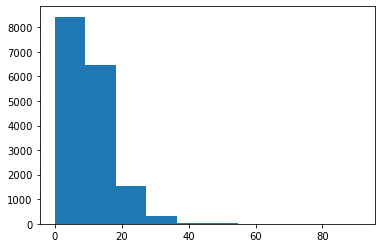

In [122]:
plt.hist(x_train_len)

In [123]:
max_len=30
X_train_pad=pad_sequences(X_train,maxlen=max_len)
X_test_pad=pad_sequences(X_test,maxlen=max_len)

In [124]:
X_train_pad

array([[   0,    0,    0, ...,  405,   32,   13],
       [   0,    0,    0, ...,    5,    2,  247],
       [   0,    0,    0, ...,    2,   71,   27],
       ...,
       [   0,    0,    0, ...,  196,    2,  168],
       [   0,    0,    0, ...,   31,   17,   32],
       [   0,    0,    0, ...,    9, 1272, 1024]])

In [125]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [126]:
filename = './model/model-{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [127]:
mck = ModelCheckpoint(filename,
                     monitor='val_accuracy',
                     verbose=1,
                     save_best_only=True)

In [128]:
model2=Sequential()
model2.add(Embedding(max_words,100))
model2.add(LSTM(128,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(256,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(128,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(256,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(128))
model2.add(Dropout(0.2))
model2.add(Dense(4,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',
             metrics=['accuracy'])
history=model2.fit(X_train_pad,y_train,epochs=10,batch_size=10,
                  validation_split=0.1, callbacks=[mck])

Epoch 1/10
1515/1515 [==============================] - 125s 73ms/step - loss: 1.2163 - accuracy: 0.4119 - val_loss: 0.8826 - val_accuracy: 0.6245

Epoch 00001: val_accuracy improved from -inf to 0.62448, saving model to ./model\model-01-0.6245.hdf5
Epoch 2/10
1515/1515 [==============================] - 110s 72ms/step - loss: 0.8280 - accuracy: 0.6600 - val_loss: 0.9029 - val_accuracy: 0.6263

Epoch 00002: val_accuracy improved from 0.62448 to 0.62626, saving model to ./model\model-02-0.6263.hdf5
Epoch 3/10
1515/1515 [==============================] - 110s 73ms/step - loss: 0.7590 - accuracy: 0.6987 - val_loss: 0.8010 - val_accuracy: 0.6780

Epoch 00003: val_accuracy improved from 0.62626 to 0.67796, saving model to ./model\model-03-0.6780.hdf5
Epoch 4/10
1515/1515 [==============================] - 110s 73ms/step - loss: 0.7073 - accuracy: 0.7253 - val_loss: 0.8246 - val_accuracy: 0.6833

Epoch 00004: val_accuracy improved from 0.67796 to 0.68330, saving model to ./model\model-04-0.6

In [129]:
print("\n 테스트 정확도 : {:.2f}%".format(model2.evaluate(X_test_pad,y_test)[1]*100))

176/176 [==============================] - 7s 37ms/step - loss: 0.8830 - accuracy: 0.6957

 테스트 정확도 : 69.57%


In [130]:
pre = model2.predict(X_test_pad)

In [131]:
X_test_pad.shape

(5610, 30)

In [132]:
p = pre.argmax(axis=1)
p.shape

(5610,)

In [133]:
p

array([0, 0, 2, ..., 3, 3, 3], dtype=int64)

In [134]:
yp = y_test.argmax(axis=1)
yp

array([0, 1, 2, ..., 1, 1, 2], dtype=int64)

In [135]:
print(classification_report(yp,p))

              precision    recall  f1-score   support

           0       0.62      0.67      0.65      1400
           1       0.75      0.71      0.73      1384
           2       0.68      0.51      0.58      1336
           3       0.73      0.87      0.79      1490

    accuracy                           0.70      5610
   macro avg       0.69      0.69      0.69      5610
weighted avg       0.70      0.70      0.69      5610



In [ ]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
rc('font', family=font_name)

In [ ]:
import re
import pandas as pd
import datetime as dt

def read_kko_msg(filename):
    with open(filename, encoding='utf-8') as f:
        msg_list = f.readlines()
    return msg_list

def apply_kko_regex(msg_list):
    kko_pattern = re.compile("\[([\S\s]+)\] \[(오전|오후) ([0-9:\s]+)\] ([^\n]+)")
    kko_date_pattern = re.compile("--------------- ([0-9]+년 [0-9]+월 [0-9]+일) ")

    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)

    kko_parse_result = list()
    cur_date = ""

    for msg in msg_list:
        # 날짜 부분인 경우
        if len(kko_date_pattern.findall(msg)) > 0:
            cur_date = dt.datetime.strptime(kko_date_pattern.findall(msg)[0], "%Y년 %m월 %d일")
            cur_date = cur_date.strftime("%Y-%m-%d")
        else:
            kko_pattern_result = kko_pattern.findall(msg)
            if len(kko_pattern_result) > 0:
                tokens = list(kko_pattern_result[0])
                # 이모지 데이터 삭제
                tokens[-1] = re.sub(emoji_pattern, "", tokens[-1])
                tokens.insert(0, cur_date)
                kko_parse_result.append(tokens)

    kko_parse_result = pd.DataFrame(kko_parse_result, columns=["Date", "Speaker", "timetype", "time", "contents"])
    kko_parse_result.to_csv("./kko_regex.csv", index=False)

    return kko_parse_result


In [ ]:
from datetime import datetime,timedelta
from soynlp.normalizer import *

In [ ]:
from hanspell import spell_checker
from ckonlpy.tag import Twitter 
def processing(text):
    text=preprocessing(text)
    spelled_sent = spell_checker.check(text)
    hanspell_sent = spelled_sent.checked 
    return hanspell_sent

In [ ]:
from konlpy.tag import Kkma
from ckonlpy.tag import Twitter
from konlpy.corpus import kolaw
import nltk

In [ ]:
from IPython.display import set_matplotlib_formats
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
stopword_list=pd.read_csv('./stopwords.txt',delimiter='\t')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
model=load_model('./model-10-0.6958.hdf5')

In [ ]:
import konlpy
from konlpy.tag import Okt
from keras_preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences

In [ ]:
def play(df , num):
    df.Date = pd.to_datetime(df.Date)
    df["year"] = df['Date'].dt.strftime('%Y')
    df["month"] = df['Date'].dt.strftime('%m')
    df["day"] = df['Date'].dt.strftime('%d')
    df["24time"] = df["timetype"] + " " + df["time"]
    df["24time"] = df["24time"].map(lambda x : x.replace("오전","AM"))
    df["24time"] = df["24time"].map(lambda x : x.replace("오후","PM"))
    temp = []
    transform_time = []
    for i in range(len(df)) :
        time = df["24time"][i]
        temp.append(dt.datetime.strptime(time,"%p %I:%M"))
        transform_time.append(temp[i].time())

    df["24time"] = transform_time
    
    title_len = []

    for i in range(len(df)):
        ttl = len(df['contents'][i])
        title_len.append(ttl)

    df['length'] = title_len
    
    count1=df[df['Speaker']==df['Speaker'].unique()[0]]['Date'].count()
    count2=df[df['Speaker']==df['Speaker'].unique()[1]]['Date'].count()
    count=count1+count2
    
    time=df['24time']

    hh=[]
    mm=[]
    for i in range(len(time)):
        hh.append(time[i].hour)
        mm.append(time[i].minute)

    df['hh']=hh
    df['mm']=mm
    
    date = []
    time = []
    for i in range(len(df)) :
        dd = str(df["Date"][i]).split(" 00:")[0]
        tt= str(df["24time"][i]).split(":00")[0]
    
        date.append(dd)
        time.append(tt)
    
    d = pd.DataFrame(date)
    t = pd.DataFrame(time)

    df["Datetime"] = d + " " + t
    df.Datetime = pd.to_datetime(df.Datetime)
    
    #시간계산을 위한 csv 파일 만들기 
    df['is_indifferent'] = ((df['Speaker'] != df['Speaker'].shift(-1)))
    
   
    

    ########time_list 를 뽑기위한 식!!! - > 필요없고 , 속도 를 빠르게 하기위해 뺌
    #minute=[]
    #minute_min=df['Datetime'][0]
    #for i in range(len(minute)):
    #   minute_min+=minute[i]
    #timedelta=(minute_min-df['Datetime'][0])/len(df['contents'])
    #days=timedelta.components.days
    #minutes=timedelta.components.minutes
    #seconds=timedelta.components.seconds
    
    #time_list=[days,minutes,seconds]
    
    df_under_4  = df[df['length']<=4].copy()
    df_under_4['chat_index'] = df_under_4.index
    df_under_4.reset_index(inplace=True,drop=True)
    
    msgdict = {}
    for i in range(len(df_under_4)-1) :
        for j in range(i,len(df_under_4)-2):
            if df_under_4.iloc[j]['chat_index']+1 == df_under_4.iloc[j+1]['chat_index']:
                j+=1
            else :
                if j not in msgdict :
                    msgdict[j] = i
                break
      
        #j = i
        #while(True):
        #    if df_under_4.iloc[j]['chat_index']+1 == df_under_4.iloc[j+1]['chat_index']:
         #       j+=1
          #  else :
           #     break
        #if j not in msgdict :
         #   msgdict[j] = i
            
        
    
        for j in range(i,len(df_under_4)-2):
            if df_under_4.iloc[j]['chat_index']+1 == df_under_4.iloc[j+1]['chat_index']:
                j+=1
            else :
                if j not in msgdict :
                    msgdict[j] = i
                break
            
    df2 = pd.DataFrame([],columns=df_under_4.columns)
    for k in msgdict :
        v = msgdict[k]
    
        msg = " ".join(df_under_4[df_under_4['length']<=4].iloc[v:k+1]['contents'])
        
        joinSeries = df_under_4.iloc[v].copy()
        joinSeries['contents'] = msg
    
        df2 = df2.append(joinSeries)
    df_over_4  = df[df['length']>4].copy()
    final=pd.concat([df_over_4,df2]).sort_index()
    final_list=[]
    for i in range(len(final['contents'])):
        final_list.append(processing(final['contents'].iloc[i]))
        final['contents'].iloc[i]=final_list[i]
    
    emoticon_normalize('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', num_repeats=3)
    
    final.reset_index(inplace=True)
    
    
    #okt=Okt()
    #twitter=Twitter()
    #twitter.add_dictionary('ㅋㅋㅋ','Noun')
    #twitter.add_dictionary('ㅎㅎㅎ','Noun')
    #twitter.add_dictionary('ㅠㅠ','Noun')
    #twitter.add_dictionary('ㅜㅜ','Noun')
    #twitter.add_dictionary('불용어','Noun')
    kkma=Kkma()
    data=[]
    for i in range(len(final['contents'])):
        data.append(final['contents'][i])
    
    #for i in range(len(data)):
    #   data[i]=data[i].replace("ㅋㅋㅋ","크쑴")
    
    data_txt=[]
    
    for sentence in data:
        try:
            temp_X=[]
            temp_X=kkma.morphs(sentence)
            data_txt.append(temp_X)
        except:
            temp_X=[""]
            data_txt.append(temp_X)
    
    
    max_words=1900
    tokenizer=Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(data_txt)
    f_data=tokenizer.texts_to_sequences(data_txt)
    max_len=20
    data_pad=pad_sequences(f_data,maxlen=max_len)
    
    p=model.predict(data_pad).argmax(axis=1)
    
    worry=0
    angry=0
    sad=0
    happy=0

    for i in range(len(p)):
        if(p[i]==0):
            worry+=1
        elif(p[i]==1):
            angry+=1
        elif(p[i]==2):
            sad+=1
        elif(p[i]==3):
            happy+=1
            
    total_list=[worry, angry, sad, happy]
    
    k_word=["ㅋㅋㅋ"]
    kkk_list=[]
    for sentence in final_list:
        temp_X=[]
        temp_X=kkma.nouns(sentence)
        temp_X=[word for word in temp_X if word in k_word]
        kkk_list.append(temp_X)
    korean_particle=len(kkk_list)
    
    stopwords=[]
    for i in range(len(stopword_list['word'])):
        stopwords.append(stopword_list['word'][i])
    
    final['predict']=p
    
    worry_contents=final[final['predict']==0]['contents']
    words_list=[]
    for sentence in worry_contents:
        temp_X=[]
        temp_X=kkma.nouns(sentence)
        temp_X=[word for word in temp_X if not word in stopwords]
        temp_X=[word for word in temp_X if not word in k_word]
        words_list.append(temp_X)
    worry_list=[]
    for i in range(len(words_list)):
        for j in range(len(words_list[i])):
            worry_list.append(words_list[i][j])
    count_worry=Counter(worry_list)
    worry_top=dict(count_worry.most_common(n=3))
    worry_top3=[]
    for k in worry_top.keys():
        worry_top3.append(k)
    if len(worry_top3)==0:
        worry_top3=["","",""]
    elif len(worry_top3)==1:
        worry_top3.append("")
        worry_top3.append("")
    elif len(worry_top3)==2:
        worry_top3.append("")
    
    angry_contents=final[final['predict']==1]['contents']
    words_list=[]
    for sentence in angry_contents:
        temp_X=[]
        temp_X=kkma.nouns(sentence)
        temp_X=[word for word in temp_X if not word in stopwords]
        temp_X=[word for word in temp_X if not word in k_word]
        temp_X=[word for word in temp_X if not word in worry_top3]
        words_list.append(temp_X)
    angry_list=[]
    for i in range(len(words_list)):
        for j in range(len(words_list[i])):
            angry_list.append(words_list[i][j])
    count_angry=Counter(angry_list)
    angry_top=dict(count_angry.most_common(n=3))
    angry_top3=[]
    for k in angry_top.keys():
        angry_top3.append(k)
    if len(angry_top3)==0:
        angry_top3=["","",""]
    elif len(angry_top3)==1:
        angry_top3.append("")
        angry_top3.append("")
    elif len(angry_top3)==2:
        angry_top3.append("")

    sad_contents=final[final['predict']==2]['contents']
    words_list=[]
    for sentence in sad_contents:
        temp_X=[]
        temp_X=kkma.nouns(sentence)
        temp_X=[word for word in temp_X if not word in stopwords]
        temp_X=[word for word in temp_X if not word in k_word]
        temp_X=[word for word in temp_X if not word in worry_top3]
        temp_X=[word for word in temp_X if not word in angry_top3]
        words_list.append(temp_X)
    sad_list=[]
    for i in range(len(words_list)):
        for j in range(len(words_list[i])):
            sad_list.append(words_list[i][j])
    count_sad=Counter(sad_list)
    sad_top=dict(count_sad.most_common(n=3))
    sad_top3=[]
    for k in sad_top.keys():
        sad_top3.append(k)
    if len(sad_top3)==0:
        sad_top3=["","",""]
    elif len(sad_top3)==1:
        sad_top3.append("")
        sad_top3.append("")
    elif len(sad_top3)==2:
        sad_top3.append("")
    
    happy_contents=final[final['predict']==3]['contents']
    words_list=[]
    for sentence in happy_contents:
        temp_X=[]
        temp_X=kkma.nouns(sentence)
        temp_X=[word for word in temp_X if not word in stopwords]
        temp_X=[word for word in temp_X if not word in k_word]
        temp_X=[word for word in temp_X if not word in worry_top3]
        temp_X=[word for word in temp_X if not word in angry_top3]
        temp_X=[word for word in temp_X if not word in sad_top3]
        words_list.append(temp_X)
    happy_list=[]
    for i in range(len(words_list)):
        for j in range(len(words_list[i])):
            happy_list.append(words_list[i][j])
    count_happy=Counter(happy_list)
    happy_top=dict(count_happy.most_common(n=3))
    happy_top3=[]
    for k in happy_top.keys():
        happy_top3.append(k)
    if len(happy_top3)==0:
        happy_top3=["","",""]
    elif len(happy_top3)==1:
        happy_top3.append("")
        happy_top3.append("")
    elif len(happy_top3)==2:
        happy_top3.append("")
    
    word_list=[]
    for i in range(len(worry_top3)):
        word_list.append(worry_top3[i])
    for i in range(len(angry_top3)):
        word_list.append(angry_top3[i])
    for i in range(len(sad_top3)):
        word_list.append(sad_top3[i])
    for i in range(len(happy_top3)):
        word_list.append(happy_top3[i])
    
    morning1=df[(7<=df['hh']) & (df['hh']<=11) & (df['Speaker']==df['Speaker'].unique()[0])].count().Date
    morning2=df[(7<=df['hh']) & (df['hh']<=11) & (df['Speaker']==df['Speaker'].unique()[1])].count().Date
    morning=morning1+morning2
    
    night1=df[(19<=df['hh']) & (df['hh']<=24)& (df['Speaker']==df['Speaker'].unique()[0])].count().Date + df[(0<=df['hh']) & (df['hh']<=2)& (df['Speaker']==df['Speaker'].unique()[0])].count().Date
    night2=df[(19<=df['hh']) & (df['hh']<=24)& (df['Speaker']==df['Speaker'].unique()[1])].count().Date + df[(0<=df['hh']) & (df['hh']<=2)& (df['Speaker']==df['Speaker'].unique()[1])].count().Date
    
    sum_emotion=worry+angry+sad+happy
    w=np.around(worry/sum_emotion*100,1)
    a=np.around(angry/sum_emotion*100,1)
    s=np.around(sad/sum_emotion*100,1)
    h=np.around(happy/sum_emotion*100,1)
    
    final_emotion=int(np.around(((w+h)*0.7+(a+s)*0.3)*36.5/70))
    
    night=night1+night2
        
    mor_night=[morning,night]
    mntotal=morning + night
    #관계계산을 위해 추가 !! 
    delta_list=[]
    count_list=[mntotal, count, korean_particle]
    
    for i in range(len(df['is_indifferent'])-1):
        if df['is_indifferent'][i+1]!=df['is_indifferent'][i]:
            delta_list.append(df['Datetime'][i+1]-df['Datetime'][i])
    
    
    file1=pd.DataFrame({'differ':delta_list})
    file2=pd.DataFrame({'another':count_list})
    file=pd.concat([file1,file2],axis=1)
    
    #file.rename(columns={file.columns[0]:"differ"},inplace=True)
   
    file.to_csv('./timeFile/time{}.csv'.format(num))
    
    
    result_list=[count,korean_particle,total_list,word_list,mor_night,w,a,s,h,final_emotion]
    
    return result_list

In [ ]:
import numpy as np
import datetime
import os
import cv2

In [ ]:
path_dir = 'C:/Users/SMT055/python/2차 프로젝트/timeFile'
file_list = os.listdir(path_dir)
file_list

In [ ]:
time1 = pd.read_csv('./timeFile/time1.csv')
t1=np.array(time1['differ'])
time2 = pd.read_csv('./timeFile/time2.csv')
t2=np.array(time2['differ'])
time3 = pd.read_csv('./timeFile/time3.csv')
t3=np.array(time3['differ'])
time4 = pd.read_csv('./timeFile/time4.csv')
t4=np.array(time4['differ'])
time5 = pd.read_csv('./timeFile/time5.csv')
t5=np.array(time5['differ'])

In [ ]:
def make_min(data):
    days=[]
    hours=[]
    minus=[]
    secs=[]
    make_min=[]

    for i in range(len(data)):
        day=data['differ'][i].split(" ")[0]
        hour=data['differ'][i].split(" ")[2].split(":")[0]
        minu=data['differ'][i].split(" ")[2].split(":")[1]
        sec=data['differ'][i].split(" ")[2].split(":")[2]

        days.append(day)
        hours.append(hour)
        minus.append(minu)
        secs.append(sec) 

    make_min=[]
    
    for i in range(len(data)):
        day_sum=0.0
        hours_sum=0.0
        minu_sum=0.0
        sec_sum=0.0
        day_sum+= float(days[i])
        hours_sum+=float(hours[i])
        minu_sum+=float(minus[i])
        sec_sum+=float(secs[i])
        total=(day_sum)*24*60+(hours_sum)*60+(minu_sum)+(sec_sum)/60
        make_min.append(total)

    data['mm']=make_min
    return data

In [ ]:
def counting(time1,time2,time3,time4,time5):
    data=pd.concat([time1,time2,time3,time4,time5],ignore_index=True)
    std=np.std(np.array(data)[:,2])
    mean=np.mean(np.array(data)[:,2])

    cnt1=len(np.array(time1['mm'])[(np.array(time1['mm']) > (mean-std)) & (np.array(time1['mm']) < (std+mean)) ])
    tcnt1=len(t1)
    r1=np.round((cnt1/tcnt1)*100,3)
    
    cnt2=len(np.array(time2['mm'])[(np.array(time2['mm']) > (mean-std)) & (np.array(time2['mm']) < (std+mean)) ])
    tcnt2=len(t2)
    r2=np.round((cnt2/tcnt2)*100,3)
    
    cnt3=len(np.array(time3['mm'])[(np.array(time3['mm']) > (mean-std)) & (np.array(time3['mm']) < (std+mean)) ])
    tcnt3=len(t3)
    r3=np.round((cnt3/tcnt3)*100,3)
    
    cnt4=len(np.array(time4['mm'])[(np.array(time4['mm']) > (mean-std)) & (np.array(time4['mm']) < (std+mean)) ])
    tcnt4=len(t4)
    r4=np.round((cnt4/tcnt4)*100,3)
    
    cnt5=len(np.array(time5['mm'])[(np.array(time5['mm']) > (mean-std)) & (np.array(time5['mm']) < (std+mean)) ])
    tcnt5=len(t5)
    r5=np.round((cnt5/tcnt5)*100,3)
    
    r_count=[r1,r2,r3,r4,r5]
    return r_count

In [ ]:
counting( make_min(time1), make_min(time2), make_min(time3), make_min(time4), make_min(time5))

In [ ]:
num = 0
def num_plus():
    global num
    num+=1
    return num

In [ ]:
m_n_count=[]
count=[]
k_count=[]

m_n_count.append(time1.iloc[:,2][0])
m_n_count.append(time2.iloc[:,2][0])
m_n_count.append(time3.iloc[:,2][0])
m_n_count.append(time4.iloc[:,2][0])
m_n_count.append(time5.iloc[:,2][0])

count.append(time1.iloc[:,2][1])
count.append(time2.iloc[:,2][1])
count.append(time3.iloc[:,2][1])
count.append(time4.iloc[:,2][1])
count.append(time5.iloc[:,2][1])

k_count.append(time1.iloc[:,2][2])
k_count.append(time2.iloc[:,2][2])
k_count.append(time3.iloc[:,2][2])
k_count.append(time4.iloc[:,2][2])
k_count.append(time5.iloc[:,2][2])

In [ ]:
def make_order(index0,index1,index2,index3,index4):
    r=m_n_count
    t=np.array(r)
    s=np.sort(t)
    
    index0=np.where( s== r[0])
    index0=index0[0][0]+1
    index1=np.where( s== r[1])
    index1=index1[0][0]+1
    index2=np.where( s== r[2])
    index2=index2[0][0]+1
    index3=np.where( s== r[3])
    index3=index3[0][0]+1
    index4=np.where( s== r[4])
    index4=index4[0][0]+1
    result=[index0,index1,index2,index3,index4]

    for i in range(5):
        if result[i]==1:
            result[i]=10
        elif result[i]==2:
            result[i]=15
        elif result[i]==3:
            result[i]=20
        elif result[i]==4:
            result[i]=25
        elif result[i]==5:
            result[i]=30
    return result


In [ ]:
def make_order(index0,index1,index2,index3,index4):
    r=m_n_count
    t=np.array(r)
    s=np.sort(t)
    
    index0=np.where( s== r[0])
    index0=index0[0][0]+1
    index1=np.where( s== r[1])
    index1=index1[0][0]+1
    index2=np.where( s== r[2])
    index2=index2[0][0]+1
    index3=np.where( s== r[3])
    index3=index3[0][0]+1
    index4=np.where( s== r[4])
    index4=index4[0][0]+1
    result=[index0,index1,index2,index3,index4]

    for i in range(5):
        if result[i]==1:
            result[i]=10
        elif result[i]==2:
            result[i]=15
        elif result[i]==3:
            result[i]=20
        elif result[i]==4:
            result[i]=25
        elif result[i]==5:
            result[i]=30
    return result


In [ ]:
make_counting(r,m_n_count,count,k_count)

In [ ]:
from flask import Flask,request , redirect #플라스트 클래스(미니서버) 임포트
from werkzeug.utils import secure_filename


app=Flask(__name__) #내장변수 name을 이용해 서버 구동시키는 객체 생성

@app.route("/predict", methods = ['GET', 'POST'])
def predict():
    if request.method == 'POST':
        f = request.files['file']
        #파일저장
        f.save("./dataFile/" + secure_filename(f.filename))
        path = "./dataFile/"
        file = path + f.filename
        
        #파일불러오기
        msg_list = read_kko_msg(file)
        #파일전처리
        apply_kko_regex(msg_list)
        df = pd.read_csv("./kko_regex.csv")
        
        #텐서플로우모델학습
      
        #play(df,num_plus(num))
        result_list =play(df,num_plus())
        
        #카운트리스트
        countList = counting(make_min(time1),make_min(time2),make_min(time3),make_min(time4),make_min(time5))
        
        print(result_list)
        #processing(file)
        
        
    return redirect("http://119.200.190.151:8034/2ndProject/data.jsp?count="
                          + str(result_list[0]) + "&kikiCount=" 
                          + str(result_list[1]) + "&worry="
                          + str(result_list[2][0])+ "&angry=" + str(result_list[2][1])+ "&sad=" + str(result_list[2][2])+ "&happy=" + str(result_list[2][3])+ "&worry1="
                          + str(result_list[3][0]) +"&worry2=" + str(result_list[3][1])+ "&worry3=" + str(result_list[3][2])+ "&angry1=" + str(result_list[3][3]) + "&angry2=" + str(result_list[3][4])+ "&angry3=" + str(result_list[3][5])+ "&sad1="+ str(result_list[3][6])+ "&sad2="+ str(result_list[3][7])+ "&sad3="+ str(result_list[3][8])+ "&happy1="+str(result_list[3][9])+ "&happy2="+ str(result_list[3][10])+ "&happy3="+ str(result_list[3][11]) +"&morning="
                          + str(result_list[4][0])  + "&night=" + str(result_list[4][1])
                          + "&w=" + str(result_list[5])
                          + "&a=" + str(result_list[6])
                          + "&s=" + str(result_list[7])
                          + "&h=" + str(result_list[8])
                          + "&t=" + str(result_list[9])
                          #+ "&1relation=" + str(countList[0]) + "&2relation" + str(countList[1]) + "&3relation"+ str(countList[2]) +"&4relation"+ str(countList[3]) +"&5relation"+ str(countList[4])
                          )

@app.route("/timefile" , methods = ['GET', 'POST'])
def timefile():
    
    #countList = counting(make_min(time1),make_min(time2),make_min(time3),make_min(time4),make_min(time5))
    #countList[0]
    countList= make_counting(r,m_n_count,count,k_count)
    return redirect("http://119.200.190.151:8034/2ndProject/memory.jsp?1relation=" + str(countList[0]) + "&2relation=" + str(countList[1]) + "&3relation="+ str(countList[2]) +"&4relation="+ str(countList[3]) +"&5relation="+ str(countList[4]))



#서버 구동
app.run(host='118.40.82.69', port='9000') 